In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch
from datetime import datetime
import numpy as np
import geopandas as gpd

In [2]:
# plt.rcParams['font.family'] = 'DejaVu Sans'
# # plt.rcParams['font.serif'] = ['CMU Serif Roman'] + plt.rcParams['font.serif']
# plt.rcParams['font.size'] = 9

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

In [3]:
timeline = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTs9PZ4BOmtMfIUPoEhp_ErUY8NN2xR7hXlOPO7F275-nOAFg5jvr0nawwa9aid9wbYWgrk9bDzxCIr/pub?gid=1068953222&single=true&output=csv')

In [4]:
who_cases = pd.read_csv('/home/andre/Documents/work/covid_france/WHO-COVID-19-global-data.csv')
who_cases_france = who_cases.loc[who_cases.Country=='France'].reset_index(drop=True)

In [5]:
who_cases_france['new_cases_mov_average'] = who_cases_france.New_cases.rolling(window=7).mean()

In [6]:
names = ['1st Lockdown',' ','2nd Lockdown (L1)','Curfew (C1)','Curfew Extention (C2)','3rd Lockdown (L2)',' ', 'Curfew (C3)',' ']

dates = ['2020-03-17','2020-05-11','2020-10-30','2020-12-15','2021-01-16','2021-04-03','2021-05-05','2021-05-31']

In [7]:
# dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

In [8]:
levels = np.tile([-1, 1, -1, 1, 2, -1,1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

In [9]:
def set_spine(ax,value):
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(value)
        ax.spines[axis].set_color("black")
        ax.spines[axis].set_zorder(0)   

In [10]:
names = ['Spring','Lockdown','L1','C1','C2','L2','C3',' ']

dates = ['2020-03-17','2020-05-11','2020-10-30','2020-12-15','2021-01-16','2021-04-03','2021-05-05','2021-05-31']

# First version of the daily cases + timeline. Backup in case the final version is not ready

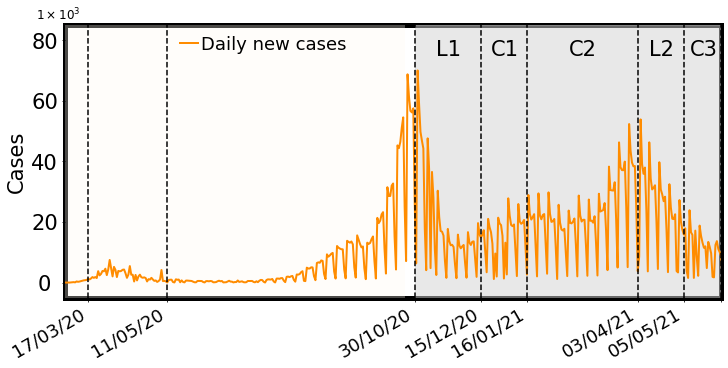

In [11]:
#simple plot of daily cases in France 

fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

ax.plot(who_cases_france.Date_reported,who_cases_france.New_cases,label='Daily new cases',c='darkorange',lw=2)

for date in dates:
    ax.axvline(date,ls='--',c='black')

# ax.text('2020-03-31',74000,names[0],fontsize=21)
# ax.text('2020-03-24',66000,names[1],fontsize=21)
ax.text('2020-11-14',75000,names[2],fontsize=21)
ax.text('2020-12-22',75000,names[3],fontsize=21)
ax.text('2021-02-14',75000,names[4],fontsize=21)
ax.text('2021-04-11',75000,names[5],fontsize=21)
ax.text('2021-05-09',75000,names[6],fontsize=21)

ax.axvspan('2020-10-30','2021-05-31',color='lightgray',alpha=0.5)

ax.set_xticks(dates)
ax.set_xticklabels(['17/03/20','11/05/20','30/10/20','15/12/20','16/01/21','03/04/21','05/05/21',' '],fontsize=18,rotation=30,ha='right')

ax.set_yticks([0,20000,40000,60000,80000])
ax.set_yticklabels(['0 ','20','40','60','80'],fontsize=21)

plt.axvspan('2020-03-01','2020-10-23',facecolor='floralwhite',alpha=0.3)

plt.legend(bbox_to_anchor = (0.15, 1.02), loc='upper left',ncol=2,  handletextpad=0.2,frameon=False,handlelength=1,fontsize=18)

ax.set_ylabel('Cases',fontsize=21)

ax.set_xlim(['2020-03-01','2021-05-31'])
ax.set_ylim([-5000,85000])

a = 1e3

def as_si(x, ndp):
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    return r'{m:s}\times 10^{{{e:d}}}'.format(m=m, e=int(e))


ax.text('2020-02-10', 86500, r"${0:s}$".format(as_si(a,0)), size=12)

# plt.savefig('/home/andre/Documents/covid_france/timeline_cases.png',bbox_inches='tight',dpi=200)

set_spine(ax,5)

plt.show()


In [12]:
size = who_cases_france.Date_reported[301:].shape[0]

# Second version of the plot - daily cases and timeline as subplots 

<ipython-input-16-36d55e92874b>:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout(h_pad=0)


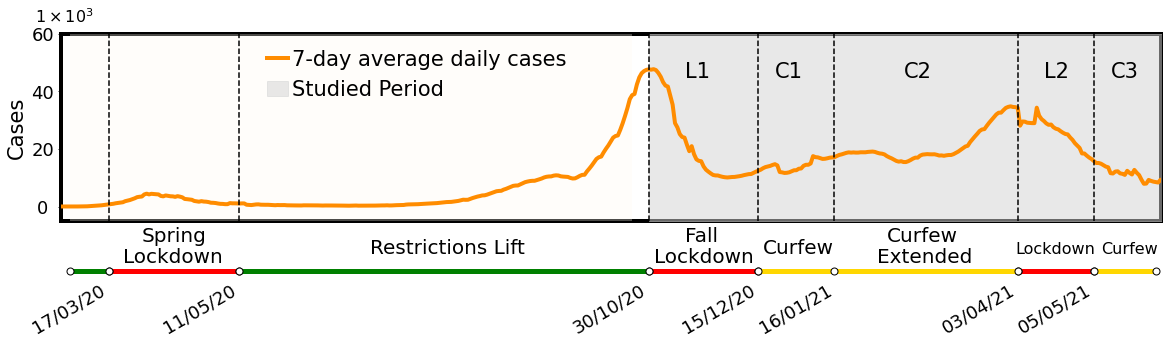

In [16]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16, 4), constrained_layout=True,gridspec_kw={'height_ratios': [5, 1]})

plt.tight_layout(h_pad=0)

## timeseries of daily cases - ax1

ax1.plot(who_cases_france.Date_reported[6:],who_cases_france.new_cases_mov_average[6:],label='7-day average daily cases',c='darkorange',lw=4)

ax1.fill_between(who_cases_france.Date_reported[301:],np.repeat(-5000,size),np.repeat(60000,size),color='lightgray',alpha=0.5,label='Studied Period')

dates = ['2020-03-17','2020-05-11','2020-10-30','2020-12-15','2021-01-16','2021-04-03','2021-05-05']

for date in dates:
    ax1.axvline(date,ls='--',c='black')

ax1.text('2020-11-14',45000,names[2],fontsize=21)
ax1.text('2020-12-22',45000,names[3],fontsize=21)
ax1.text('2021-02-14',45000,names[4],fontsize=21)
ax1.text('2021-04-14',45000,names[5],fontsize=21)
ax1.text('2021-05-12',45000,names[6],fontsize=21)

# ax1.axvspan('2020-10-30','2021-05-31',color='lightgray',alpha=0.5)

ax1.set_xticks([])

ax1.set_yticks([0,20000,40000,60000,80000])
ax1.set_yticklabels(['0 ','20','40','60','80'],fontsize=18)

ax1.axvspan('2020-03-01','2020-10-23',facecolor='floralwhite',alpha=0.3)

ax1.legend(bbox_to_anchor = (0.17, 1.02), loc='upper left',ncol=1,  handletextpad=0.2,frameon=False,handlelength=1,fontsize=21)

ax1.set_ylabel('Cases',fontsize=21)

ax1.set_xlim(['2020-02-26','2021-06-02'])
ax1.set_ylim([-5000,60000])

a = 1e3

def as_si(x, ndp):
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    return r'{m:s}\times 10^{{{e:d}}}'.format(m=m, e=int(e))


ax1.text('2020-02-15', 64000, r"${0:s}$".format(as_si(a,0)), size=16)

set_spine(ax1,4)

## time series of restrictions - ax2 

dates2 = ['2020-03-17','2020-05-11','2020-10-30','2020-12-15','2021-01-16','2021-04-03','2021-05-05']

dates_l0 = ['2020-03-17','2020-05-11']
dates_l1 = ['2020-10-30','2020-12-15']
dates_l2 = ['2021-04-03','2021-05-05']
dates_n0 = ['2020-03-01','2020-03-17']
dates_n1 = ['2020-05-11','2020-10-30']
dates_c1_c2 = ['2020-12-15','2021-01-16','2021-04-03']
dates_c3 = ['2021-05-05','2021-05-31']

ax2.plot(who_cases_france.Date_reported[6:],np.zeros_like(who_cases_france.Date_reported[6:]),c='white')  #just to make the x axis the same lenght 
ax2.plot(dates_l0,np.zeros_like(dates_l0),"-o",color='r',markerfacecolor="w",markeredgecolor='black',lw=5,markersize=7)
ax2.plot(dates_l1,np.zeros_like(dates_l1),"-o",color='r',markerfacecolor="w",markeredgecolor='black',lw=5,markersize=7)
ax2.plot(dates_l2,np.zeros_like(dates_l2),"-o",color='r',markerfacecolor="w",markeredgecolor='black',lw=5,markersize=7)
ax2.plot(dates_n0,np.zeros_like(dates_n0),"-o",color='g',markerfacecolor="w",markeredgecolor='black',lw=5,markersize=7)
ax2.plot(dates_n1,np.zeros_like(dates_n1),"-o",color='g',markerfacecolor="w",markeredgecolor='black',lw=5,markersize=7)
ax2.plot(dates_c1_c2,np.zeros_like(dates_c1_c2),"-o",color='gold',markerfacecolor="w",markeredgecolor='black',lw=5,markersize=7)
ax2.plot(dates_c3,np.zeros_like(dates_c3),"-o",color='gold',markerfacecolor="w",markeredgecolor='black',lw=5,markersize=7)

names_periods=['Spring','Lockdown','Restrictions Lift','Fall','Lockdown','Curfew','Extended','Curfew','Lockdown','Curfew']

ax2.text('2020-03-31',0.1,names_periods[0],fontsize=20)
ax2.text('2020-03-23',0.03,names_periods[1],fontsize=20)

ax2.text('2020-07-05',0.06,names_periods[2],fontsize=20)

ax2.text('2020-11-14',0.1,names_periods[3],fontsize=20)
ax2.text('2020-11-01',0.03,names_periods[4],fontsize=20)

ax2.text('2020-12-17',0.06,names_periods[5],fontsize=20)

ax2.text('2021-02-07',0.1,names_periods[7],fontsize=20)
ax2.text('2021-02-03',0.03,names_periods[6],fontsize=20)

ax2.text('2021-04-02',0.06,names_periods[8],fontsize=16)

ax2.text('2021-05-08',0.06,names_periods[9],fontsize=16)

ax2.set_xlim(['2020-02-26','2021-06-02'])
ax2.set_ylim([-0.03,0.1])

ax2.set_xticks(dates2)
ax2.set_xticklabels(['17/03/20','11/05/20','30/10/20','15/12/20','16/01/21','03/04/21','05/05/21'],fontsize=18,rotation=30,ha='right')
ax2.tick_params(bottom=False,pad=-2)

ax2.set_yticks([])

ax2.yaxis.set_visible(False)

ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)


plt.savefig('/home/andre/Documents/work/covid_france/timeline_cases_v2.png',bbox_inches='tight',dpi=200)

plt.show()

In [20]:
print(dates[0])
print(who_cases_france.Date_reported[20])

2020-03-17
2020-01-23


# Vaccination data 

In [24]:
vac = pd.read_csv('/home/andre/Documents/work/covid_france/vaccination.csv')

In [25]:
vac_france = vac.loc[vac.location=='France'].reset_index(drop=True)

In [26]:
vac_france.loc[vac_france.date=='2021-05-30']

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
154,France,FRA,2021-05-30,36541213.0,25765670.0,11048697.0,138540.0,487590.0,54.08,38.14,16.35,7217.0
